Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:

from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

# Importing EDA and Plotting libraries
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns


#association rule
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

# Plots will appear inside notebooks
%matplotlib inline

# Importing Machine Learning Models from SciKit Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree


# Importing Evaluation Libraries
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, RocCurveDisplay


dataset_dir = pd.read_excel("/content/drive/MyDrive/zomato_pune.xlsx")
data = dataset_dir




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Initial EDA

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Here is the data preparation for Association Rule
#Assuming the original dataset is stored in df called data
cuisines = data['Cuisines'].str.get_dummies(sep=", ")
ratings = data.iloc[:,4:5]
dummies = data.iloc[:,17:-1]
data_assco = ratings.join(dummies)
data_assco = data_assco.join(cuisines)
data_assco
#eliminate noise in ratings_out_of_5
data_assco = data_assco[data_assco["Ratings_out_of_5"]!= '0']
data_assco = data_assco[data_assco["Ratings_out_of_5"]!= '-']
#convert rating_out_of_5 to numeric data
data_assco['Ratings_out_of_5'] = pd.to_numeric(data_assco.iloc[:,0])
#Make one-hot-coded for rating
ratings_column = data_assco['Ratings_out_of_5']
dummy_col_1 = (ratings_column >= 0) & (ratings_column <= 2.9)
dummy_col_2 = (ratings_column >= 3.0) & (ratings_column <= 3.9)
dummy_col_3 = (ratings_column >= 4.0) & (ratings_column <= 4.9)
dummy_col_1 = dummy_col_1.astype(int)
dummy_col_2 = dummy_col_2.astype(int)
dummy_col_3 = dummy_col_3.astype(int)
data_assco_one_hot = pd.concat([data_assco, dummy_col_1, dummy_col_2, dummy_col_3], axis=1)
column_names = list(data_assco.columns) + ["Rating_between_0_to_2.9", "Rating_between_3.0_to_3.9", "Rating_between_4.0_to_4.9"]
data_assco_one_hot.columns = column_names
data_assco_one_hot = data_assco_one_hot.drop('Ratings_out_of_5', axis=1)
#The df used in Association Rule is called: data_assco_one_hot


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


$Support(\{X\} \to \{Y\}) = \frac{Transactions\:containing\:both\:X\:and\:Y}{Total\:number\:of\:transactions}$

$Confidence(\{X\} \to \{Y\}) = \frac{Transactions\:containing\:both\:X\:and\:Y}{Transactions\:containing\:X}$

$Lift(\{X\} \to \{Y\}) = \frac{(Transactions\:containing\:both\:X\:and\:Y)/ Transactions\:containing\:X}{Fraction\:of\:transactions\:containing\:Y}$

In [ ]:
#First See association rule between rating and "North Indian"
frequent_itemsets = fpgrowth(data_assco_one_hot, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules_sorted_by_confidence = rules.sort_values(by='zhangs_metric', ascending=False)

target_rule = rules_sorted_by_confidence[rules_sorted_by_confidence['consequents'].apply(lambda x: "Rating_between_3.0_to_3.9" in str(x))]
target_rule_at_least_two_antecedents = target_rule[target_rule['antecedents'].apply(lambda x: len(x) >= 2)]
target_rule_with_north_indian = target_rule_at_least_two_antecedents[target_rule_at_least_two_antecedents['antecedents'].apply(lambda x: "North Indian" in x)]

target_rule_with_north_indian_sorted = target_rule_with_north_indian.sort_values(by='confidence', ascending=False)

print("Association rules related to 'Rating_between_3.0_to_3.9' with antecedents containing at least two items and 'North Indian', sorted by confidence:")
print(target_rule_with_north_indian_sorted)

#Then reset the support = 0.01
frequent_itemsets = fpgrowth(data_assco_one_hot, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules_sorted_by_confidence = rules.sort_values(by='zhangs_metric', ascending=False)
target_rule = rules_sorted_by_confidence[rules_sorted_by_confidence['consequents'].apply(lambda x: "Rating_between_4.0_to_4.9" in str(x))]

print("Association rules related to 'Rating_between_4.0_to_4.9':")
target_rule




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Association rules related to 'Rating_between_3.0_to_3.9' with antecedents containing at least two items and 'North Indian', sorted by confidence:
                                      antecedents  \
8   (Indoor Seating, North Indian, Home Delivery)   
6                   (Home Delivery, North Indian)   
23                        (Chinese, North Indian)   
4                  (Indoor Seating, North Indian)   

                    consequents  antecedent support  consequent support  \
8   (Rating_between_3.0_to_3.9)            0.302578               0.675   
6   (Rating_between_3.0_to_3.9)            0.361435               0.675   
23  (Rating_between_3.0_to_3.9)            0.284753               0.675   
4   (Rating_between_3.0_to_3.9)            0.391256               0.675   

     support  confidence      lift  leverage  conviction  zhangs_metric  
8   0.224327    0.741386  1.098349  0.020087    1.256698       0.128391  
6   0.263677    0.729529  1.080783  0.019709    1.201606       0

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/zomato_pune.xlsx")
df.shape
data=df

#In order to make associatio rule, need to make one-hot coded for attributes
#drop restaurant_name, web_link, locality, sponsored and etc columns as it doesn't matter in association rule
data['Charges_for_two'] = data['Charges_for_two'].str.replace('₹', '')
df.loc[df['Charges_for_two'].str.strip().str.lower() != "not present", 'Charges_for_two'] = 0

#data['Charges_for_two']=data['Charges_for_two'].astype(int)
data['Number of votes'] = data['Number of votes'].str.replace('votes', '')
data['Number of votes'] = data['Number of votes'].str.replace('Based on', '')
data['Number of votes'] = data['Number of votes'].str.replace('Na základě', '')
data['Number of votes'] = data['Number of votes'].str.replace('hlasů', '')
data['Number of votes'] = data['Number of votes'].str.replace('hlasov', '')
data['Number of votes'] = data['Number of votes'].str.replace('com base em', '')
data['Number of votes'] = data['Number of votes'].str.replace('votos', '')
data['Number of votes'] = data['Number of votes'].str.replace('głosów', '')
data['Number of votes'] = data['Number of votes'].str.replace('Na základe', '')
data['Number of votes'] = data['Number of votes'].str.replace('Na základ?', '')
data['Number of votes'] = data['Number of votes'].str.replace('?', '')
data['Number of votes'] = data['Number of votes'].str.replace('hlas', '')
data['Number of votes'] = data['Number of votes'].str.replace('gosów', '')


data['Number of votes'] = data['Number of votes'].fillna('0')
data['Number of votes']=data['Number of votes'].astype(int)

data['spam_review']=data['spam_review'].astype(int)
data['spam_review']

cuisines = data['Cuisines'].str.get_dummies(sep=", ")

Locality = data['Locality'].str.get_dummies(sep=", ")
#Sponsored = data['Sponsored'].str.get_dummies(sep=", ")
#Charges_for_two = data['Charges_for_two'].str.get_dummies(sep=", ")
#cuisines = data['Rest_timming'].str.get_dummies(sep=", ")
payment_modes = data['payment_modes'].str.get_dummies(sep=", ")
ratings = data.iloc[:,4:5]
spam = data.iloc[:,103:104]
ratings2 = data.iloc[:,4:6]
dummies = data.iloc[:,17:-1]
data_assco = ratings2.join(dummies)
data_assco = pd.concat([data_assco, spam], axis=1)
#ata_assco = data_assco.join(votes)
data_assco = data_assco.join(cuisines)
data_assco = data_assco.join(Locality)
#data_assco = data_assco.join(Sponsored)
data_assco = data_assco.join(payment_modes)
#data_assco = data_assco.join(spam)
#data_assco = data_assco.join(cuisines)
#data_assco = pd.concat([data_assco, spam], axis=1)
#data_assco['Locality']

#eliminate noise in ratings_out_of_5
data_assco = data_assco[data_assco["Ratings_out_of_5"]!= '0']
data_assco = data_assco[data_assco["Ratings_out_of_5"]!= '-']
#convert rating_out_of_5 to numeric data
data_assco['Ratings_out_of_5'] = pd.to_numeric(data_assco.iloc[:,0])

#Need to construct dummy variable for rating.
#That may like rating between [4,5], rating between [3,4],rating between [0,3]
#First check the the rating range

first_column = data_assco['Ratings_out_of_5']
min_value = np.min(first_column)
max_value = np.max(first_column)
print("Range of values in the first column:", min_value, "to", max_value)

#Make one-hot-coded for rating
ratings_column = data_assco['Ratings_out_of_5']
dummy_col_1 = (ratings_column >= 0) & (ratings_column <= 2.9)
dummy_col_2 = (ratings_column >= 3.0) & (ratings_column <= 3.9)
dummy_col_3 = (ratings_column >= 4.0) & (ratings_column <= 4.9)

dummy_col_1 = dummy_col_1.astype(int)
dummy_col_2 = dummy_col_2.astype(int)
dummy_col_3 = dummy_col_3.astype(int)


data_assco_one_hot = pd.concat([data_assco, dummy_col_1, dummy_col_2, dummy_col_3], axis=1)
column_names = list(data_assco.columns) + ["Rating_between0o3", "Rating_between3to4", "Rating_between4to5"]
data_assco_one_hot.columns = column_names
data_assco_one_hot

#Make one-hot-coded for rating
ratings_column_2 = data_assco_one_hot['Number of votes']
dummy_col_10 = (ratings_column_2 == 0)
dummy_col_11 = (ratings_column_2 >= 1) & (ratings_column_2 <= 17)
dummy_col_12 = (ratings_column_2 >= 18) & (ratings_column_2 <= 30)
dummy_col_13 = (ratings_column_2 >= 31) & (ratings_column_2 <= 100)
dummy_col_14 = (ratings_column_2 >= 101) & (ratings_column_2 <= 200)
dummy_col_15 = (ratings_column_2 >= 201) & (ratings_column_2 <= 500)
dummy_col_16 = (ratings_column_2 >= 501) & (ratings_column_2 <= 1000)
dummy_col_17 = (ratings_column_2 >= 1001) & (ratings_column_2 <= 2000)
dummy_col_18 = (ratings_column_2 >= 2501)


dummy_col_10 = dummy_col_10.astype(int)
dummy_col_11 = dummy_col_11.astype(int)
dummy_col_12 = dummy_col_12.astype(int)
dummy_col_13 = dummy_col_13.astype(int)
dummy_col_14 = dummy_col_14.astype(int)
dummy_col_15 = dummy_col_15.astype(int)
dummy_col_16 = dummy_col_16.astype(int)
dummy_col_17 = dummy_col_17.astype(int)
dummy_col_18 = dummy_col_18.astype(int)

data_assco_one_hot2 = pd.concat([data_assco_one_hot,dummy_col_10, dummy_col_11, dummy_col_12, dummy_col_13,dummy_col_14,dummy_col_15,dummy_col_16,dummy_col_17,dummy_col_18], axis=1)
column_names = list(data_assco_one_hot.columns) + ["0","1-17", "17-30", "30-100","100-200","200-500","500-1000","1000-2000",">2500"]
data_assco_one_hot2.columns = column_names
data_assco_one_hot=data_assco_one_hot2
data_assco_one_hot

X=data_assco_one_hot

y1 = data_assco_one_hot.Rating_between3to4
y2 = data_assco_one_hot.Rating_between0o3
y3 = data_assco_one_hot.Rating_between4to5
y1.head(100)


X=X.drop("Rating_between4to5",axis=1)
X=X.drop("Rating_between0o3",axis=1)
X=X.drop("Rating_between3to4",axis=1)
X=X.drop("Number of votes",axis=1)
#X=X.drop("spam_reviews",axis=1)

X

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-9-3d21a7810e57>:20: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Number of votes'] = data['Number of votes'].str.replace('Na základ?', '')
<ipython-input-9-3d21a7810e57>:21: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Number of votes'] = data['Number of votes'].str.replace('?', '')


Range of values in the first column: 0.0 to 4.9


,Wine and Beer,Dance Floor,Lunch Menu,Outdoor Seating,Seaside,4/5 Star,Free Parking,Pet Friendly,Bulk Orders Accepted,Gaming Are,...,Debit Cards accepted,0,1-17,17-30,30-100,100-200,200-500,500-1000,1000-2000,>2500
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12184,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
12185,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
12186,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
12187,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.7, random_state=101)

log_reg = LogisticRegression()
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()
svc = SVC()
dtc= DecisionTreeClassifier()

models = {
    'Logistic Regression': log_reg,
    'KNN': knn,
    'Random Forest': rfc,
    'SVC': svc,
    'Decision Tree Classifier': dtc
}

def fit_and_score(models, X_train, y1_train, X_test, y1_test):
  """
    Fits and Evaluates machine Learning Models
    models: dictionary of machine learning models from SciKit learn
    X_train: set of training features (no labels)
    X_test: set of test features (no labels)
    y_train: training labels
    y_test: test labels
  """

  np.random.seed(101)

  model_accuracy = {}

  for model_name, model in models.items():
    model.fit(X_train, y1_train)

    model_accuracy[model_name] = model.score(X_test, y1_test)

  return model_accuracy



np.random.seed(42)
model_scores = fit_and_score(models, X_train, y1_train, X_test, y1_test)
model_scores

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8220691864189622,
 'KNN': 0.8036515054452275,
 'Random Forest': 0.8336002562459962,
 'SVC': 0.8238308776425368,
 'Decision Tree Classifier': 0.7554452274183215}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'Random Forest'),
  Text(3, 0, 'SVC'),
  Text(4, 0, 'Decision Tree Classifier')])

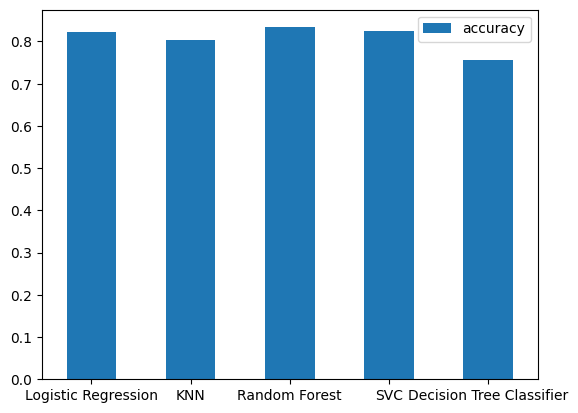

In [ ]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])

model_compare.T.plot.bar()

plt.xticks(rotation=0)

In [ ]:
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.7, random_state=101)

log_reg = LogisticRegression()
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()
svc = SVC()
dtc= DecisionTreeClassifier()

models = {
    'Logistic Regression': log_reg,
    'KNN': knn,
    'Random Forest': rfc,
    'SVC': svc,
    'Decision Tree Classifier': dtc
}

def fit_and_score(models, X_train, y2_train, X_test, y2_test):
  """
    Fits and Evaluates machine Learning Models
    models: dictionary of machine learning models from SciKit learn
    X_train: set of training features (no labels)
    X_test: set of test features (no labels)
    y_train: training labels
    y_test: test labels
  """

  np.random.seed(101)

  model_accuracy = {}

  for model_name, model in models.items():
    model.fit(X_train, y2_train)

    model_accuracy[model_name] = model.score(X_test, y2_test)

  return model_accuracy



np.random.seed(42)
model_scores2 = fit_and_score(models, X_train, y2_train, X_test, y2_test)
model_scores2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9039077514413837,
 'KNN': 0.8907751441383729,
 'Random Forest': 0.9059897501601537,
 'SVC': 0.9069506726457399,
 'Decision Tree Classifier': 0.8451313260730301}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'Random Forest'),
  Text(3, 0, 'SVC'),
  Text(4, 0, 'Decision Tree Classifier')])

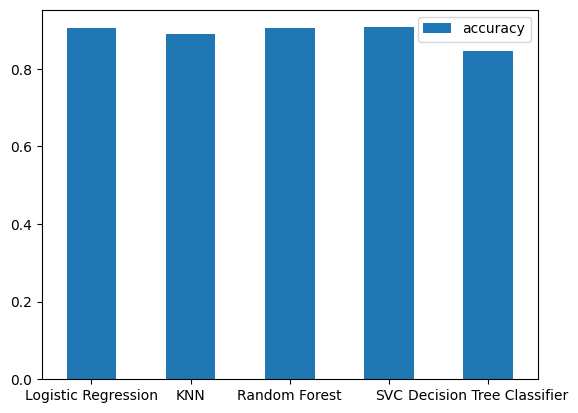

In [ ]:
model_compare = pd.DataFrame(model_scores2, index=['accuracy'])

model_compare.T.plot.bar()

plt.xticks(rotation=0)

In [ ]:
X_train, X_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.7, random_state=101)

log_reg = LogisticRegression()
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()
svc = SVC()
dtc= DecisionTreeClassifier()

models = {
    'Logistic Regression': log_reg,
    'KNN': knn,
    'Random Forest': rfc,
    'SVC': svc,
    'Decision Tree Classifier': dtc
}

def fit_and_score(models, X_train, y3_train, X_test, y3_test):
  """
    Fits and Evaluates machine Learning Models
    models: dictionary of machine learning models from SciKit learn
    X_train: set of training features (no labels)
    X_test: set of test features (no labels)
    y_train: training labels
    y_test: test labels
  """

  np.random.seed(101)

  model_accuracy = {}

  for model_name, model in models.items():
    model.fit(X_train,y3_train)

    model_accuracy[model_name] = model.score(X_test, y3_test)

  return model_accuracy



np.random.seed(42)
model_scores3 = fit_and_score(models, X_train, y3_train, X_test, y3_test)
model_scores3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9245675848814863,
 'KNN': 0.9117552850736708,
 'Random Forest': 0.925208199871877,
 'SVC': 0.9130365150544523,
 'Decision Tree Classifier': 0.9024663677130045}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'Random Forest'),
  Text(3, 0, 'SVC'),
  Text(4, 0, 'Decision Tree Classifier')])

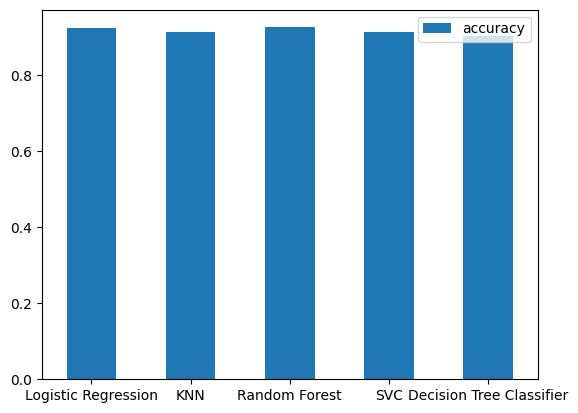

In [ ]:
model_compare = pd.DataFrame(model_scores3, index=['accuracy'])

model_compare.T.plot.bar(label='for rating 4-5')

plt.xticks(rotation=0)

In [ ]:
train_scores = []
test_scores = []

neighbors = range(1, 21)

for k in neighbors:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y1_train)
  train_scores.append(knn.score(X_train, y1_train))
  test_scores.append(knn.score(X_test, y1_test))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


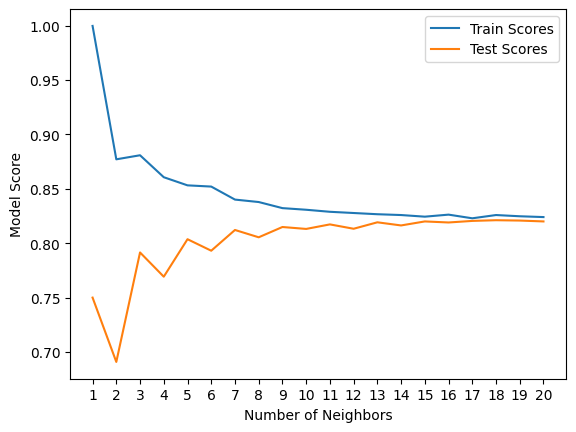

In [ ]:
# Plot K vs Errors
plt.plot(neighbors, train_scores, label="Train Scores")
plt.plot(neighbors, test_scores, label="Test Scores")
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.xticks(np.arange(1, 21, 1))
plt.legend()

In [ ]:
# Creating Hyperparameter grid for Logistic Regression
log_reg_grid = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear'],
    'penalty': ['l1', 'l2']
}

# Setting Random Seed
np.random.seed(101)

# Using Randomized Search Cross Validation to check for best parameters
rcv_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5, n_iter=20, verbose=True)

rcv_log_reg.fit(X_train, y1_train)

rcv_log_reg.score(X_test, y1_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8295964125560538

In [ ]:
# Setting Random Seed
np.random.seed(101)

# Using Randomized Search Cross Validation to check for best parameters
gridcv_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True)

gridcv_log_reg.fit(X_train, y1_train)

gridcv_log_reg.score(X_test, y1_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


0.8292761050608585

In [ ]:
# Creating hyperparamer grid for Random Forest Classification
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
    "criterion": ['gini', 'entropy']
}

# Setting Random Seed
np.random.seed(101)

# Using Randomized Search Cross Validation to check for best parameters
rcv_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv=5, n_iter=20, verbose=True)

rcv_rf.fit(X_train, y1_train)

rcv_rf.score(X_test, y1_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8222293401665599

In [ ]:
# Creating hyperparamer grid for Support Vector Classification
svc_grid = {
    'C': [0.01, 0.1, 1],
    'kernel': ['rbf']
}

# Setting Random Seed
np.random.seed(101)

# Using Randomized Search Cross Validation to check for best parameters
gridcv_svc = GridSearchCV(SVC(), param_grid=svc_grid, cv=5, verbose=True)

gridcv_svc.fit(X_train, y1_train)

gridcv_svc.score(X_test, y1_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


0.8238308776425368

In [ ]:
y_pred_log_reg = gridcv_log_reg.predict(X_test)
y_pred_log_reg

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([1, 1, 1, ..., 1, 0, 1])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


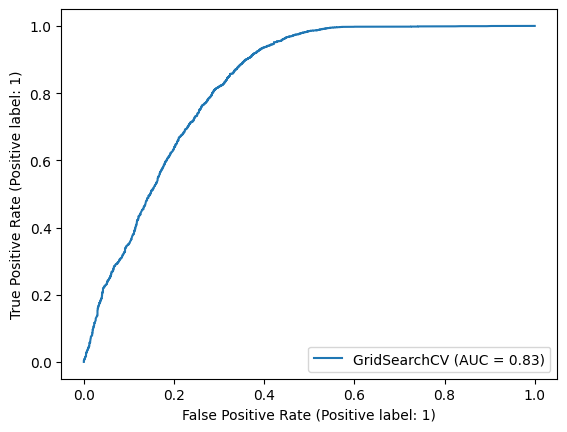

In [ ]:
# Plotting the ROC AUC for Logistic Regression Clasifier
RocCurveDisplay.from_estimator(estimator=gridcv_log_reg, X=X_test, y=y1_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

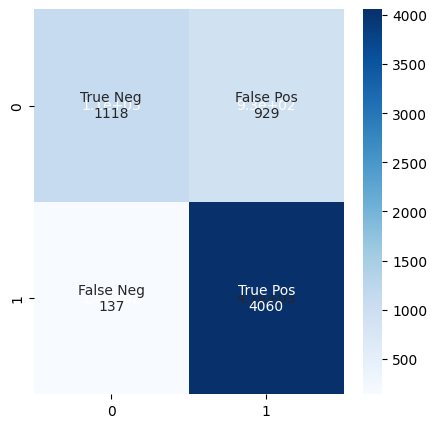

In [ ]:
# Confusion Matrix for Logistic Regression Clasifier
conf_matrix_log_reg = confusion_matrix(y1_test, y_pred_log_reg)
conf_matrix_log_reg
fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.heatmap(conf_matrix_log_reg, annot=True, cbar=False)

plt.ylabel("True Label")
plt.xlabel("Predicted Label")

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix_log_reg.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix_log_reg, annot=labels, fmt='', cmap='Blues')

In [ ]:
# Classification Report For Logistic Regression Clasifier
print(classification_report(y1_test, y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.89      0.55      0.68      2047
           1       0.81      0.97      0.88      4197

    accuracy                           0.83      6244
   macro avg       0.85      0.76      0.78      6244
weighted avg       0.84      0.83      0.82      6244



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
y_pred_rfc = rfc.predict(X_test)
y_pred_rfc

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0, 0, 0, ..., 0, 0, 0])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


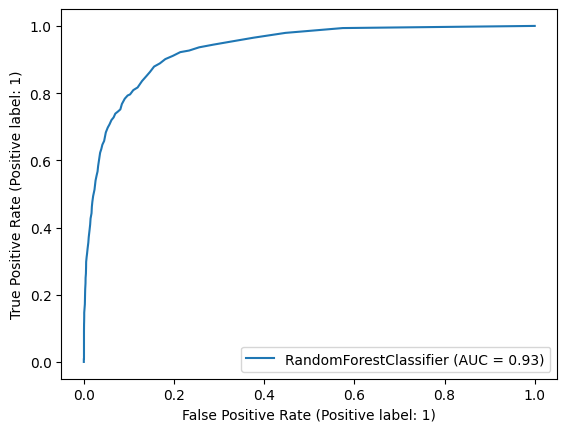

In [ ]:
# Plotting the ROC AUC for default Random Forest Clasifier
RocCurveDisplay.from_estimator(estimator=rfc, X=X_test, y=y3_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

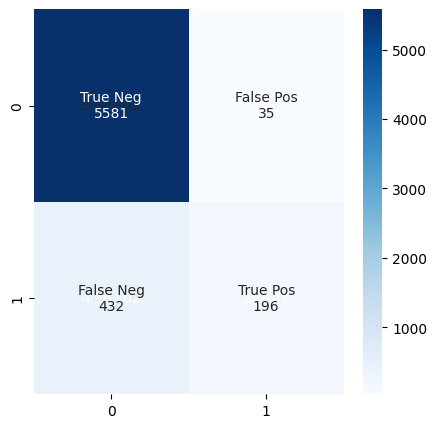

In [ ]:
# Confusion Matrix for Default Random Forest
conf_matrix_rfc = confusion_matrix(y3_test, y_pred_rfc)
conf_matrix_rfc

# Visualising Confusion Matrix for Random Forest
fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.heatmap(conf_matrix_rfc, annot=True, cbar=False)

plt.ylabel("True Label")
plt.xlabel("Predicted Label")

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix_rfc.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix_rfc, annot=labels, fmt='', cmap='Blues')

In [ ]:
# Classification Report For Random Forest Classifier
print(classification_report(y3_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5616
           1       0.85      0.31      0.46       628

    accuracy                           0.93      6244
   macro avg       0.89      0.65      0.71      6244
weighted avg       0.92      0.93      0.91      6244



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
z_p=z_p[z_p['Charges_for_two']!='Not Present'] #throw them away?!?!?!?
a=z_p['Charges_for_two'].str.split('₹',expand=True)[1]
a=a.str.split(',',expand=True)
l=[]
for i in range(0,len(a)):
    if a.iloc[i,1]==None:
        l.append(a.iloc[i,0])
    else:
        l.append(a.iloc[i,0]+a.iloc[i,1])
z_p['c_f_t']=l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


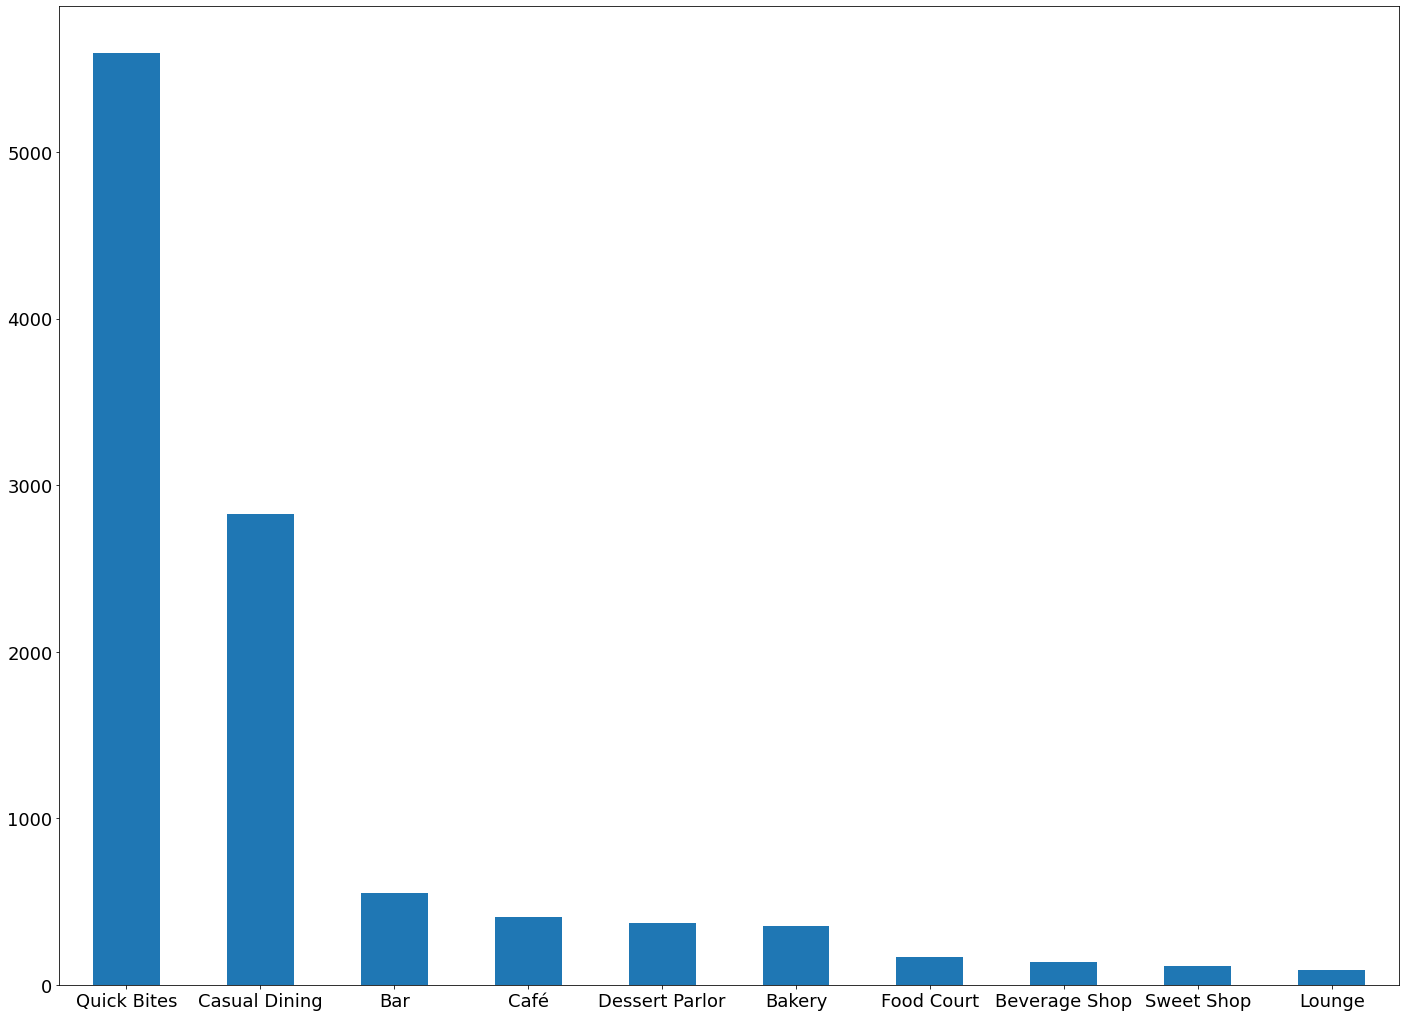

In [ ]:
#%%
import matplotlib.pyplot as plt
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus']=False

#%%%sponser
spon=z_p['Sponsored'].str.split(', ',expand=True)
count_s=spon.apply(pd.value_counts).sum(axis=1).astype(np.int)
count_stop=count_s.sort_values(ascending=False)[:10]
count_stop.plot(kind='bar',figsize=(24,18),rot=0,fontsize=18)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


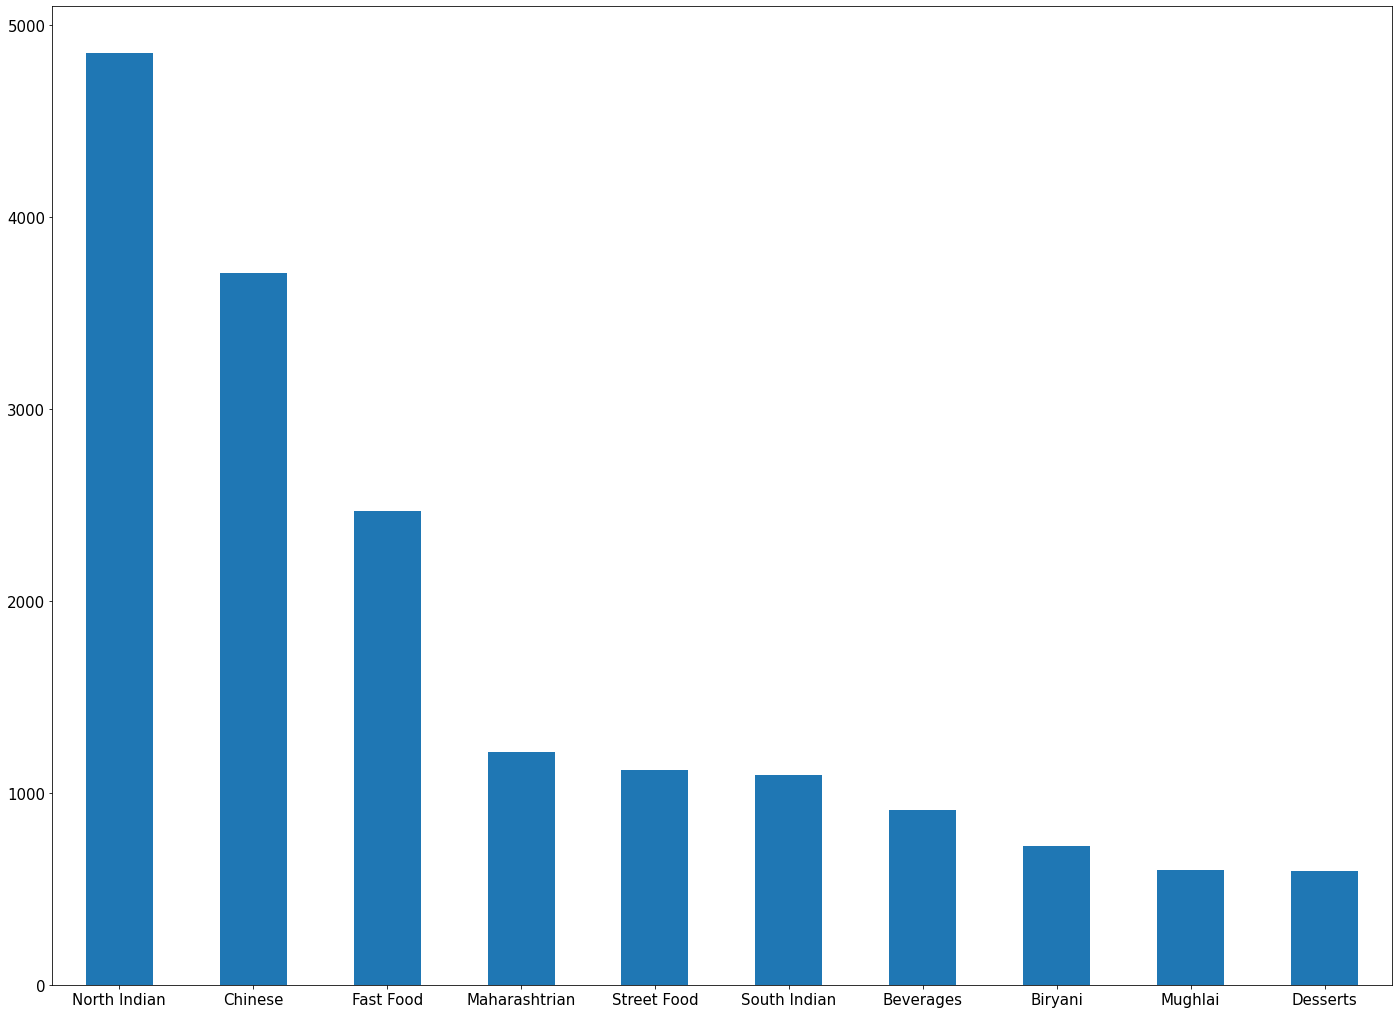

In [ ]:
#%%%cuisine
cui=z_p['Cuisines'].str.split(', ',expand=True)
count_c=cui.apply(pd.value_counts).sum(axis=1).astype(np.int)
count_ctop=count_c.sort_values(ascending=False)[:10]
count_ctop.plot(kind='bar',figsize=(24,18),rot=0,fontsize=15)

In [ ]:
#%%%charge
z_p['c_f_t']=z_p['c_f_t'].astype('int64')
z_p['c_f_t'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


count    7484.000000
mean      527.620123
std       399.953654
min        50.000000
25%       300.000000
50%       400.000000
75%       600.000000
max      4500.000000
Name: c_f_t, dtype: float64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

payment_modes,Cards only,Cash and Cards accepted,Cash and Debit Cards accepted,Cash and Digital Payments accepted,Cash and Meal Coupons accepted,Cash only,"Cash,Cards and Digital Payments accepted","Cash,Cards and Meal Coupons accepted","Cash,Cards,Meal Coupons and Digital Payments accepted","Cash,Debit Cards and Digital Payments accepted","Cash,Meal Coupons and Digital Payments accepted",Debit Cards accepted
Ratings,3.9,3.479338,3.52,2.668365,3.88,2.950223,3.204769,3.529126,3.569388,2.832727,3.4,3.7


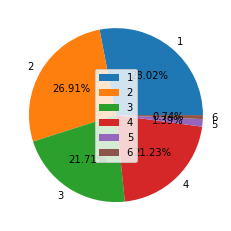

In [ ]:
bins=[0,1000,2000,3000,4000,4500]
cats=pd.cut(z_p['c_f_t'],bins,right=False)
z_p['label_c']=cats.values

z_p['Ratings']=z_p['Ratings_out_of_5'].astype('float')
z_p['Ratings'].describe()
bins1=[0,1,2,3,4,5]
cats1=pd.cut(z_p['Ratings'],bins1,right=False)
z_p['label_r']=cats1.values

#
pd.crosstab(z_p['label_r'],z_p['c_f_t'],margins=True) #
pd.crosstab(z_p['label_c'],z_p['Ratings'],margins=True,normalize='index') #

#
z_p.pivot_table(values=['Ratings'],aggfunc='mean',columns='label_c')
z_p.pivot_table(values=['c_f_t'],aggfunc='mean',columns='label_r')



#%%%payment
pay=z_p['payment_modes'].str.split(', ',expand=True)
count_p=pay.apply(pd.value_counts).sum(axis=1).astype(np.int)
count_ptop=count_p.sort_values(ascending=False)[:6]
count_ptop.reset_index
labels=['1','2','3','4','5','6']
plt.pie(count_ptop,labels=labels,autopct='%.2f%%')
fontsize=15
plt.legend(loc='center')
#plt.lables(ylable='')

pd.pivot_table(z_p,values='Ratings',columns='payment_modes') #

In [ ]:
s1=z_p[z_p.columns[z_p.dtypes=='int64']].sum()>=70
c_p=z_p[s1.index[s1.values==True]]
c_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12189 entries, 0 to 12188
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Outdoor Seating                 12189 non-null  int64
 1   Free Parking                    12189 non-null  int64
 2   Vegetarian Only                 12189 non-null  int64
 3   Brunch                          12189 non-null  int64
 4   Live Music                      12189 non-null  int64
 5   Home Delivery                   12189 non-null  int64
 6   Pre-Ordering Required           12189 non-null  int64
 7   Wifi                            12189 non-null  int64
 8   Serves Non Veg                  12189 non-null  int64
 9   Buffet                          12189 non-null  int64
 10  Table Reservation Not Required  12189 non-null  int64
 11  Rooftop                         12189 non-null  int64
 12  Live Sports Screening           12189 non-null  int64
 13  S

In [ ]:
#note: run regression in Stata: here's the Stata code:
#asdoc reg Rating  OutdoorSeating  FreeParking  VegetarianOnly  LiveMusic  HomeDelivery  Wifi  ServesNonVeg  Buffet  TableReservationNo~d  Rooftop  LiveSportsScreening  SeatingNotAvailable  DessertsandBakes  MallParking  ValetParkingAvaila~e  IndoorSeating  Nightlife  KidFriendly  AllDayBreakfast  FullBarAvailable  StandingTables  DeliveryOnly  LGBTQIAFriendly  NoAlcoholAvailable  SmokingAre  Tablebookingrecomm~d  Breakfast  TakeawayOnly  CateringAvailable  PrivateDiningAreaA~e  ServesJainFood  ServesCocktails  ServesAlcohol  Brunch  Constant

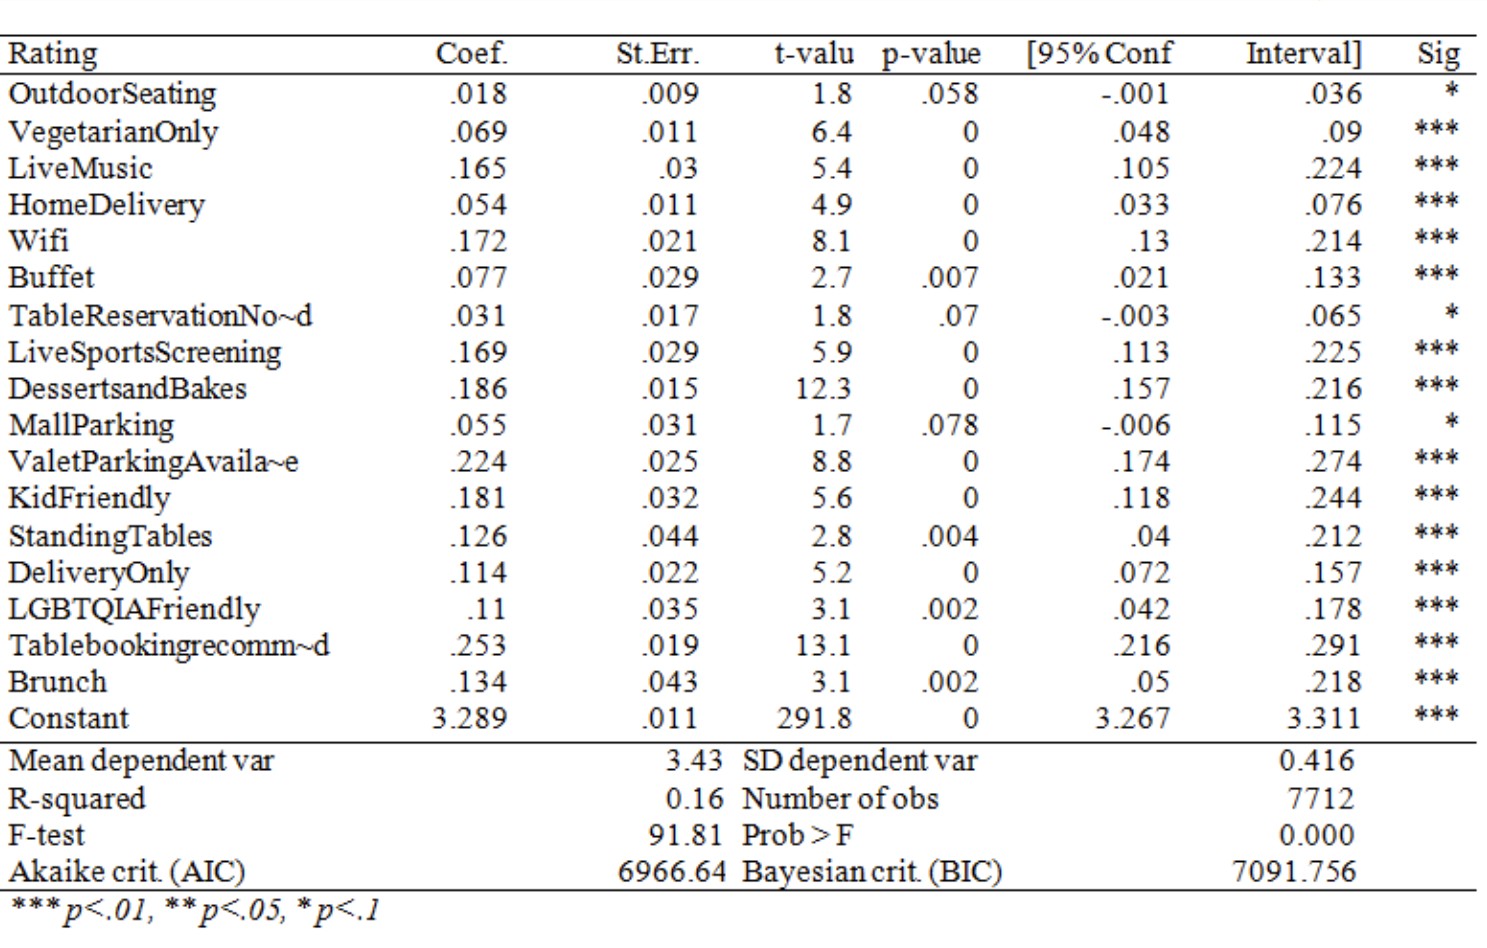

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


         Outdoor Seating  Vegetarian Only  Live Music  Home Delivery  \
Cluster                                                                
0              19.953506         0.000000    0.213096      74.079814   
1               0.000000        10.362694    0.000000       0.000000   
2              77.451802         1.508801   20.536463      61.693210   
3              53.703704        83.168724    0.246914      68.559671   
4              32.732586         8.572820    0.000000      90.160740   

              Wifi     Buffet  Table Reservation Not Required  \
Cluster                                                         
0         2.014723   1.026734                        4.998063   
1         0.000000   0.296077                        0.592154   
2        19.279128  11.818944                       10.813076   
3         2.181070   1.234568                        7.572016   
4         0.681929   0.292255                        1.607404   

         Live Sports Screening  Dessert

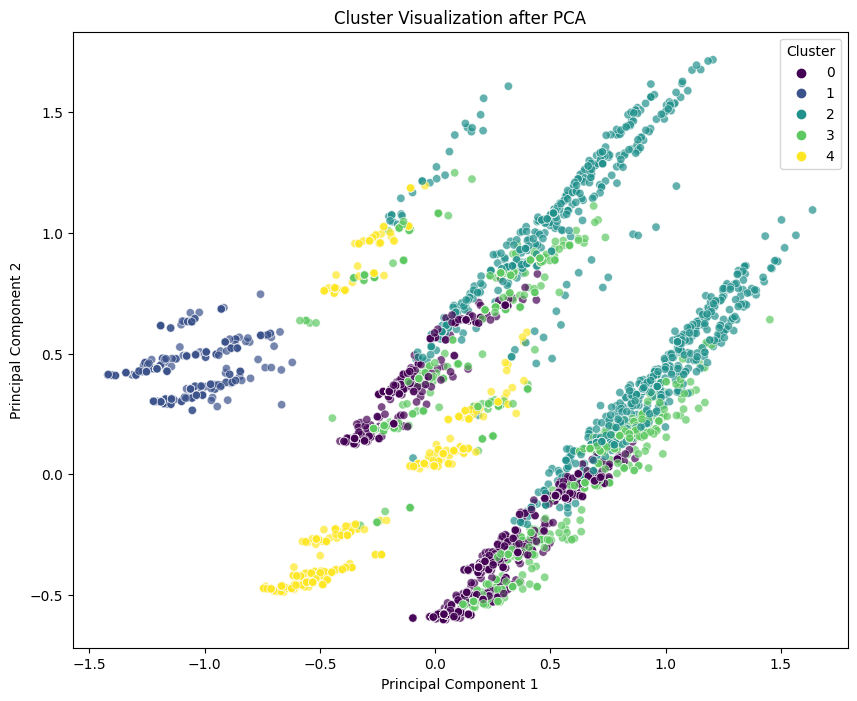

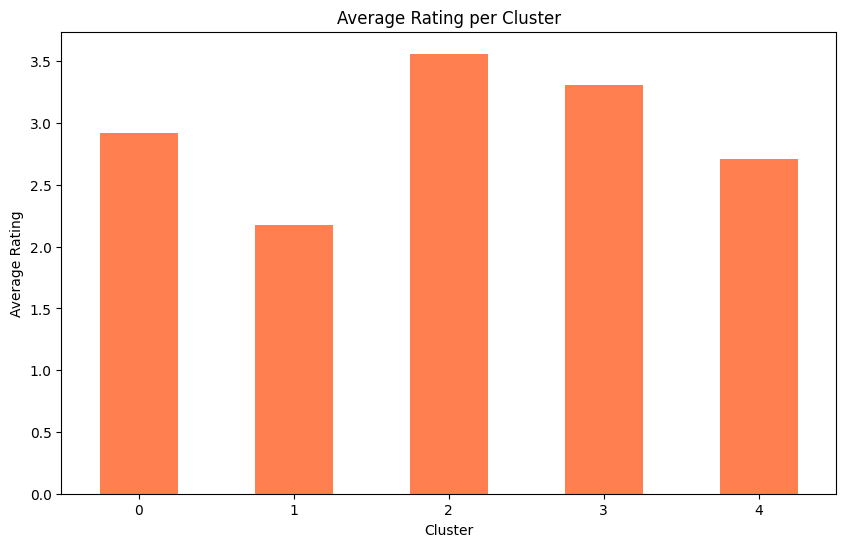

In [ ]:


# Select features for clustering - assuming they are the same as before
wine_and_beer_index = data.columns.get_loc("Wine and Beer")
feature_columns = data.columns[wine_and_beer_index:-1]  # Exclude the last column
clustering_data = data[feature_columns]

# Apply MinMax normalization
scaler = MinMaxScaler()
clustering_data_normalized = scaler.fit_transform(clustering_data.fillna(0))

# Apply K-means clustering
k = 5  # You can adjust the number of clusters
kmeans = KMeans(n_clusters=k, random_state=0).fit(clustering_data_normalized)
data['Cluster'] = kmeans.labels_

# Analyze the distribution of key features within each cluster
key_features = ['Outdoor Seating', 'Vegetarian Only', 'Live Music', 'Home Delivery', 'Wifi', 'Buffet', 'Table Reservation Not Required',
                'Live Sports Screening','Desserts and Bakes', 'Mall Parking', 'Valet Parking Available', 'Kid Friendly', 'Standing Tables',
                'Delivery Only', 'LGBTQIA Friendly', 'Table booking recommended', 'Brunch']
feature_analysis = (clustering_data[key_features]
                    .groupby(data['Cluster'])
                    .mean() * 100)  # Convert to percentage
print(feature_analysis)

# Dimensionality Reduction for Visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(clustering_data_normalized)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=principal_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('Cluster Visualization after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Analyze average ratings per cluster
cluster_analysis = data.groupby('Cluster')['Ratings_out_of_5'].agg(['mean', 'count'])
cluster_analysis.columns = ['Average Rating', 'Number of Restaurants']

# Plotting the average ratings per cluster
plt.figure(figsize=(10, 6))
cluster_analysis['Average Rating'].plot(kind='bar', color='coral')
plt.title('Average Rating per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.show()


In [ ]:
clustering_data_normalized

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.09031839],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.07732294],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


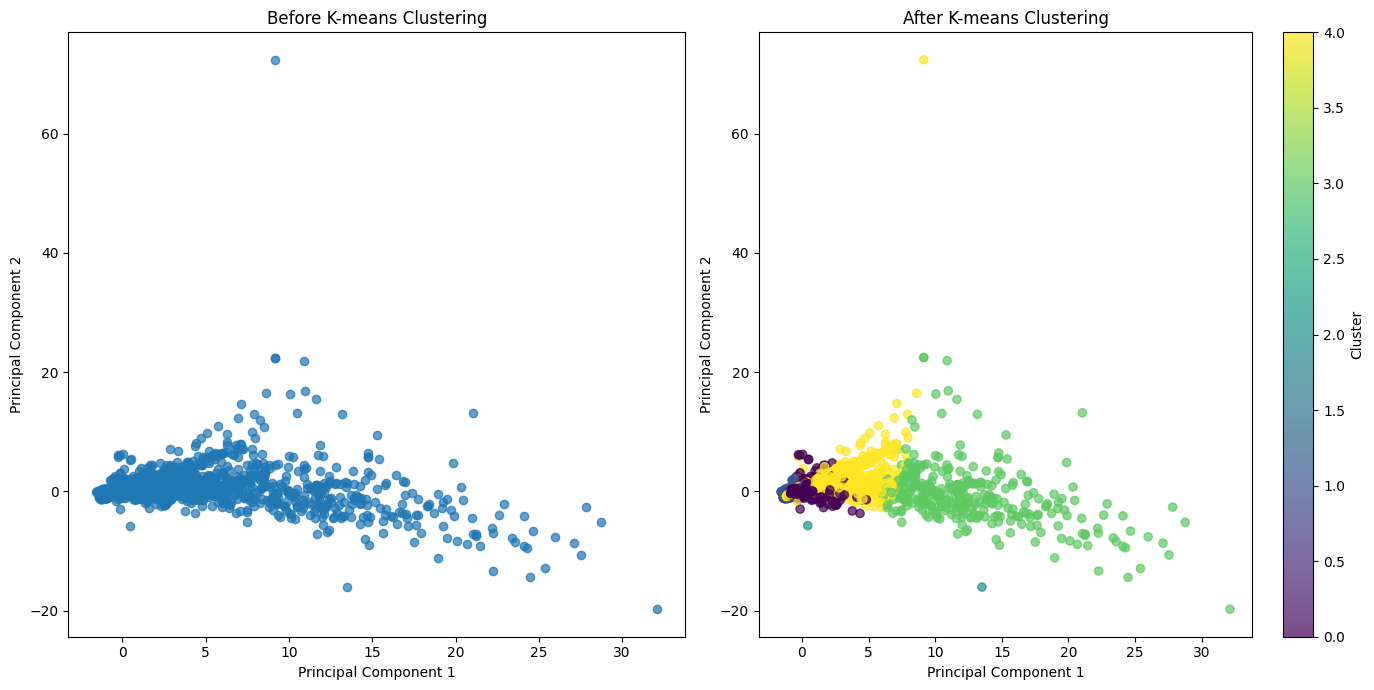

In [ ]:

from sklearn.preprocessing import StandardScaler

# Clean the 'Ratings_out_of_5' column
data['Ratings_out_of_5'] = pd.to_numeric(data['Ratings_out_of_5'], errors='coerce')

# Apply StandardScaler for normalization
scaler = StandardScaler()
clustering_data_normalized = scaler.fit_transform(clustering_data)

# Apply Incremental PCA to reduce the data to two dimensions for visualization
ipca = IncrementalPCA(n_components=2, batch_size=500)
principal_components = ipca.fit_transform(clustering_data_normalized)

# Creating a DataFrame for the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Apply K-means clustering
k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=0).fit(clustering_data_normalized)
data['Cluster'] = kmeans.labels_

# Plot before K-means clustering
plt.figure(figsize=(14, 7))

# Plotting the results of PCA without cluster labels
plt.subplot(1, 2, 1)
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.title('Before K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot after K-means clustering
plt.subplot(1, 2, 2)
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=kmeans.labels_, cmap='viridis', alpha=0.7)
plt.title('After K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')

plt.tight_layout()
plt.show()


ANALYSIS OF CLUSTERS  (TOP 5 DECIDING FACTORS )

---



Cluster 0:
Home Delivery: 77.17%
Outdoor Seating: 51.96%
Table Reservation Not Required: 99.83%
Vegetarian Only: 28.11%
Wifi: 5.79%

Cluster 1:
Desserts and Bakes: 43.65%
Delivery Only: 6.46%
Home Delivery: 11.14%
Standing Tables: 16.48%
Vegetarian Only: 27.17%

Cluster 2:
Home Delivery: 68.37%
Outdoor Seating: 29.79%
Delivery Only: 9.14%
Desserts and Bakes: 7.02%
Vegetarian Only: 19.35%

Cluster 3:
Home Delivery: 62.04%
Live Music: 72.99%
Live Sports Screening: 76.64%
Outdoor Seating: 72.26%
Table booking recommended: 55.47%

Cluster 4:
Home Delivery: 61.51%
Outdoor Seating: 67.31%
Table booking recommended: 52.50%
Valet Parking Available: 34.78%
Wifi: 26.57%


Clusters 0 & 4:
High prevalence of outdoor seating and home delivery options.

Cluster 3:
Distinguished by a significant offering of live music, outdoor seating, and wifi access.

Clusters 1 & 2:
Sparse in amenities, with Cluster 2 especially deficient across the board.
